# Table of Contents

1. Import Librares, Data, and Manipulate Data Set
2. Task 6.5

# 1. Import Libraries, Data, and Manipulate Data Set

### Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming). Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data. Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\cmkep\Cathy\World Happiness'

In [6]:
df_all = pd.read_csv(os.path.join(path, '02 Data', 'Python Exported Data', 'CF_2015_2019_2.csv'), index_col = False)

In [7]:
df_all.head()

Unnamed: 0.1  Unnamed: 0  Year      Country  Happiness_Rank  \
0             0           0  2015  Switzerland               1   
1             1           1  2015      Iceland               2   
2             2           2  2015      Denmark               3   
3             3           3  2015       Norway               4   
4             4           4  2015       Canada               5   

   Happiness_Score  GDP_Capita   Family  Life_Expectancy  Freedom  Generosity  \
0            7.587     1.39651  1.34951          0.94143  0.66557     0.29678   
1            7.561     1.30232  1.40223          0.94784  0.62877     0.43630   
2            7.527     1.32548  1.36058          0.87464  0.64938     0.34139   
3            7.522     1.45900  1.33095          0.88521  0.66973     0.34699   
4            7.427     1.32629  1.32261          0.90563  0.63297     0.45811   

   Govt_Corruption  Dystopia_Residual  Average_GDP_Capita  
0          0.41978            2.51738            1.472164  
1          0.14145            2.70201            1.386523  
2          0.48357            2.49204            1.396729  
3          0.36503            2.46531            1.519381  
4          0.32957            2.45176            1.388129

In [8]:
# Drop categorical(Year and Country columns) and Unnamed columns

df = df_all.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'Year', 'Country'])

In [9]:
df.head()

Happiness_Rank  Happiness_Score  GDP_Capita   Family  Life_Expectancy  \
0               1            7.587     1.39651  1.34951          0.94143   
1               2            7.561     1.30232  1.40223          0.94784   
2               3            7.527     1.32548  1.36058          0.87464   
3               4            7.522     1.45900  1.33095          0.88521   
4               5            7.427     1.32629  1.32261          0.90563   

   Freedom  Generosity  Govt_Corruption  Dystopia_Residual  Average_GDP_Capita  
0  0.66557     0.29678          0.41978            2.51738            1.472164  
1  0.62877     0.43630          0.14145            2.70201            1.386523  
2  0.64938     0.34139          0.48357            2.49204            1.396729  
3  0.66973     0.34699          0.36503            2.46531            1.519381  
4  0.63297     0.45811          0.32957            2.45176            1.388129

### Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\cmkep\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[-1596033.863200177,
 -399414.9221539069,
 -177838.5292156709,
 -100388.96836398052,
 -64289.499449167226,
 -44984.64738771939,
 -33057.512943128444,
 -25441.525943333712,
 -20172.14726427791]

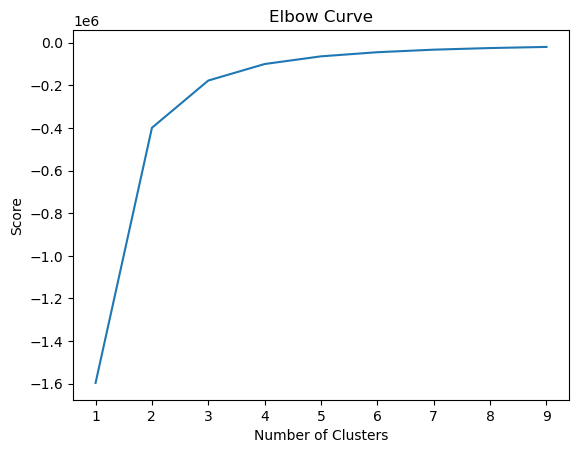

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart. Explain why you chose that number in a markdown cell.


##### The above curve flattens out after 3 so the optimal number of cluters is 3.

### Run the k-means algorithm.

In [13]:
# Create the k-means object.

# Jupyter won't let me use the keyword arugment "n_jobs" so it was omitted.

kmeans = KMeans(n_clusters = 3)

### Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [14]:
df['clusters'] = kmeans.fit_predict(df)

In [15]:
df.head()

Happiness_Rank  Happiness_Score  GDP_Capita   Family  Life_Expectancy  \
0               1            7.587     1.39651  1.34951          0.94143   
1               2            7.561     1.30232  1.40223          0.94784   
2               3            7.527     1.32548  1.36058          0.87464   
3               4            7.522     1.45900  1.33095          0.88521   
4               5            7.427     1.32629  1.32261          0.90563   

   Freedom  Generosity  Govt_Corruption  Dystopia_Residual  \
0  0.66557     0.29678          0.41978            2.51738   
1  0.62877     0.43630          0.14145            2.70201   
2  0.64938     0.34139          0.48357            2.49204   
3  0.66973     0.34699          0.36503            2.46531   
4  0.63297     0.45811          0.32957            2.45176   

   Average_GDP_Capita  clusters  
0            1.472164         0  
1            1.386523         0  
2            1.396729         0  
3            1.519381         0  
4            1.388129         0

In [16]:
df['clusters'].value_counts()

1    262
0    260
2    260
Name: clusters, dtype: int64

### Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

### Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

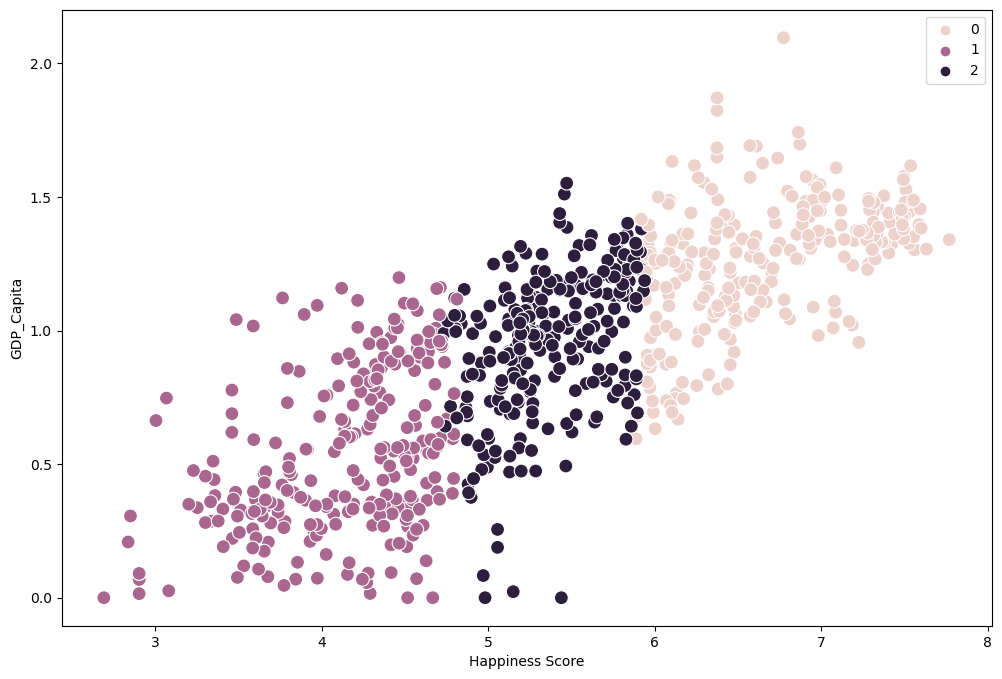

In [32]:
# Plot the clusters for the "Happiness_Score" and "GDP_Capita" variables.

plt.figure(figsize=(12,8))
K_Score_GDP = sns.scatterplot(x=df['Happiness_Score'], y=df['GDP_Capita'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

K_Score_GDP.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('GDP_Capita') # Label y-axis.
plt.show()

In [33]:
#save image to Visualizations folder
K_Score_GDP.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'K_GDP_Score_Scatter.png'))

In [18]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

##### While there is a an overall positive correlation as seen in previous exercises, interestingly there are still plenty of points where countries have a higher estimated contribution to happiness for GDP than others, but still fall lower then them on the Happiness Score scale. The happiest countries with scores of 6 or greater, still have a wide GDP_Capita range of 0.5 - >2.0.

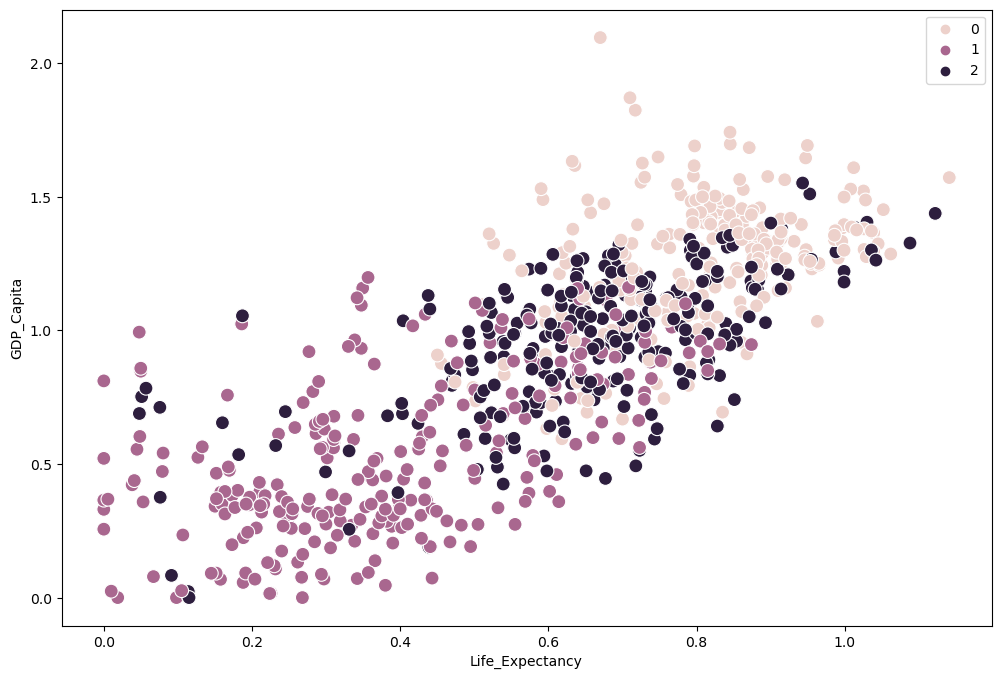

In [34]:
# Plot the clusters for the "Life_Expectancy" and "GDP_Capita" variables.

plt.figure(figsize=(12,8))
K_LE_GDP = sns.scatterplot(x=df['Life_Expectancy'], y=df['GDP_Capita'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

K_LE_GDP.grid(False) # This removes the grid from the background.
plt.xlabel('Life_Expectancy') # Label x-axis.
plt.ylabel('GDP_Capita') # Label y-axis.
plt.show()

In [35]:
#save image to Visualizations folder
K_LE_GDP.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'K_GDP_LE_Scatter.png'))

##### While overlap is to be expected, this cluster analysis shows that the greater the estimated contribution of GDP per capita to a country's happiness score, the greater the estimated contribution of life expectancy as well and vice versa. This makes sense as countries with a large GDP would be expected to have higher quality healthcare services that would increase longevity. A longer lifespan increases one's time to experience happiness and good health would lead to a better quality of life, as well. People would also be happier to have loved ones around as long as possible. 

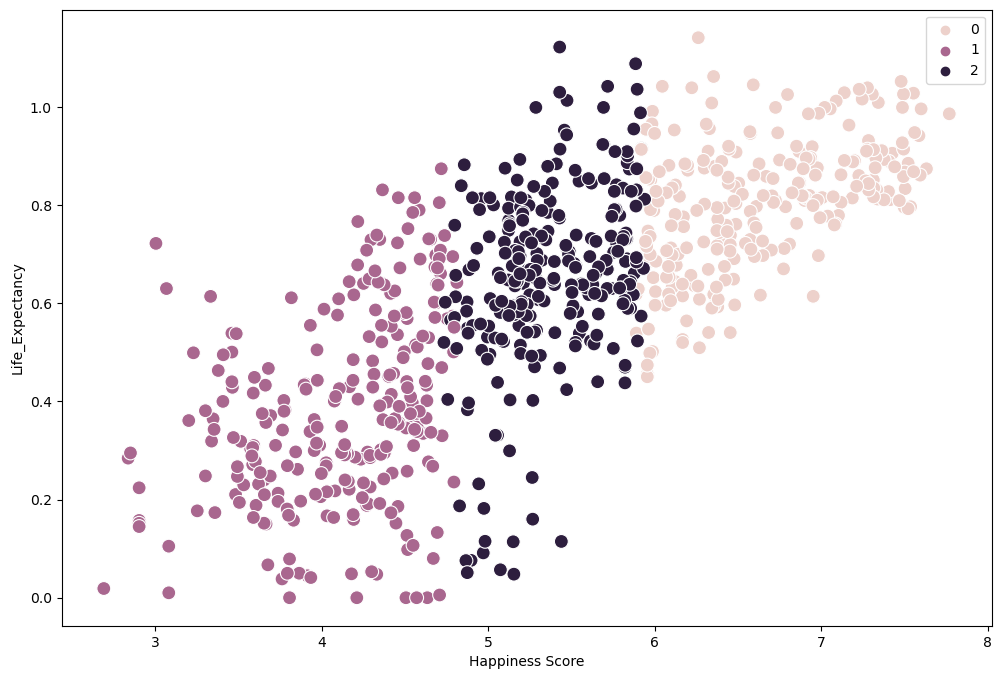

In [36]:
# Plot the clusters for the "Happiness_Score" and "Life_Expectancy" variables.

plt.figure(figsize=(12,8))
K_Score_LE = sns.scatterplot(x=df['Happiness_Score'], y=df['Life_Expectancy'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

K_Score_LE.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Life_Expectancy') # Label y-axis.
plt.show()

In [37]:
#save image to Visualizations folder
K_Score_LE.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'K_LE_Score_Scatter.png'))

##### This is unsurprising, given the strong correlation between GDP_Capita and Life Expectancy, that this cluster analysis mimics the GDP_Capita and Happiness Score cluster analysis.

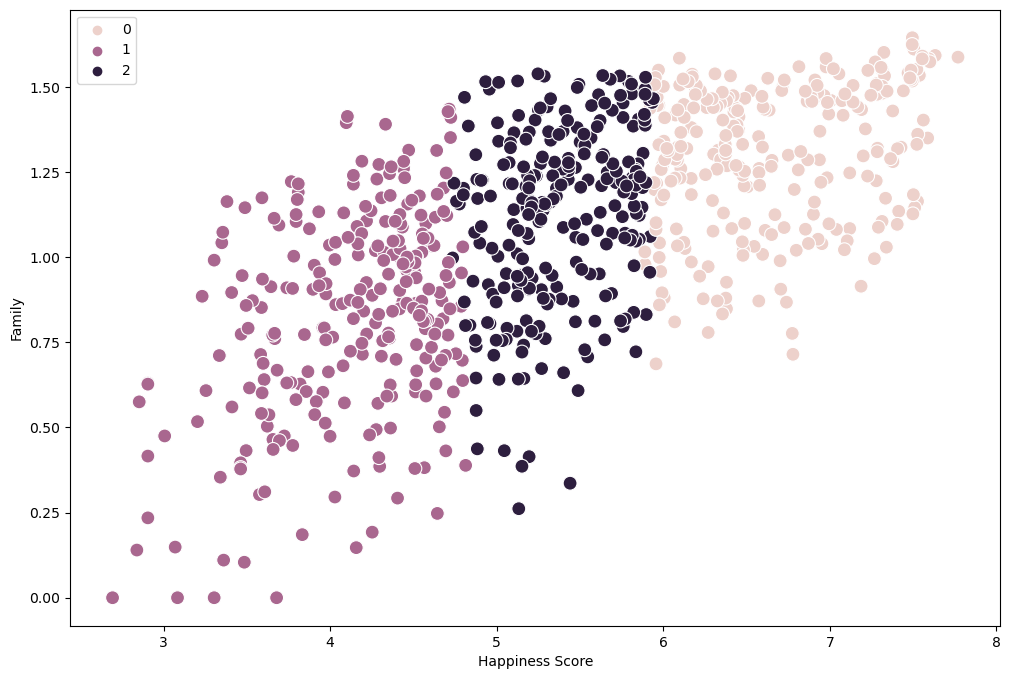

In [38]:
# Plot the clusters for the "Happiness_Score" and "Family" variables.

plt.figure(figsize=(12,8))
K_Score_Fam = sns.scatterplot(x=df['Happiness_Score'], y=df['Family'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

K_Score_Fam.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Family') # Label y-axis.
plt.show()

In [39]:
#save image to Visualizations folder
K_Score_Fam.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'K_Fam_Score_Scatter.png'))

##### There is a weak positive correlation between estimated contribution of Family (Social Support) to a country's Happiness score but it is starting to look like any variable plotted against Happiness Score just separates the clusters in to <5, 5-6, and >6. All three clusters have the exact, or almost exact, number of data points.

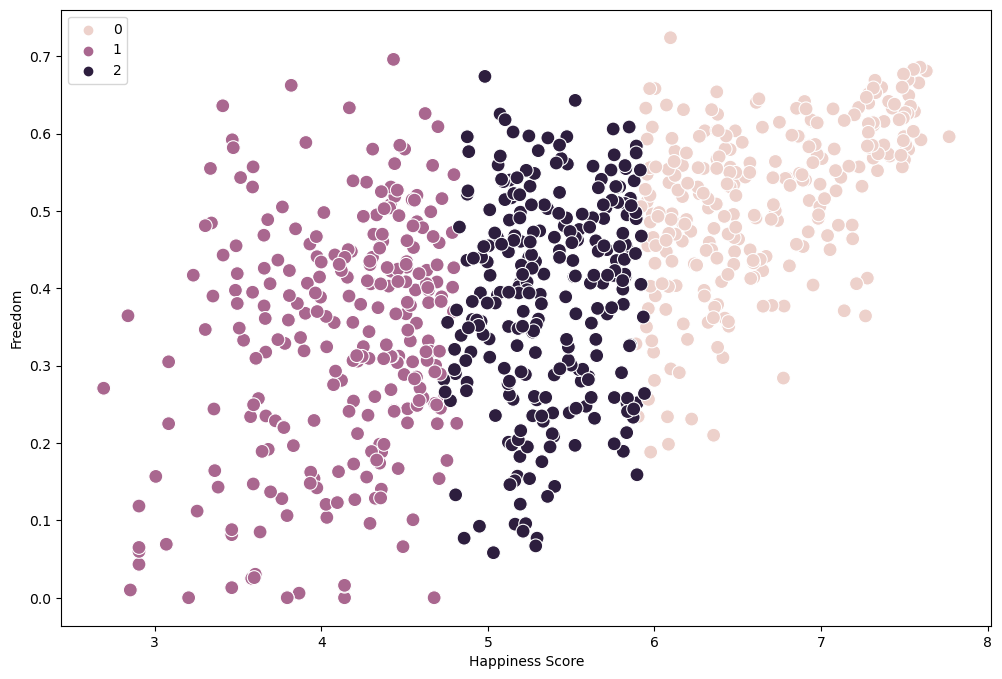

In [40]:
# Plot the clusters for the "Happiness_Score" and "Freedom" variables.

plt.figure(figsize=(12,8))
K_Score_Free = sns.scatterplot(x=df['Happiness_Score'], y=df['Freedom'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

K_Score_Free.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Freedom') # Label y-axis.
plt.show()

In [41]:
#save image to Visualizations folder
K_Score_Free.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'K_Free_Score_Scatter.png'))

##### This doesn't really tell me much. It is the same segregation of clusters along the Happiness Scale for a very weakly positive correlation.

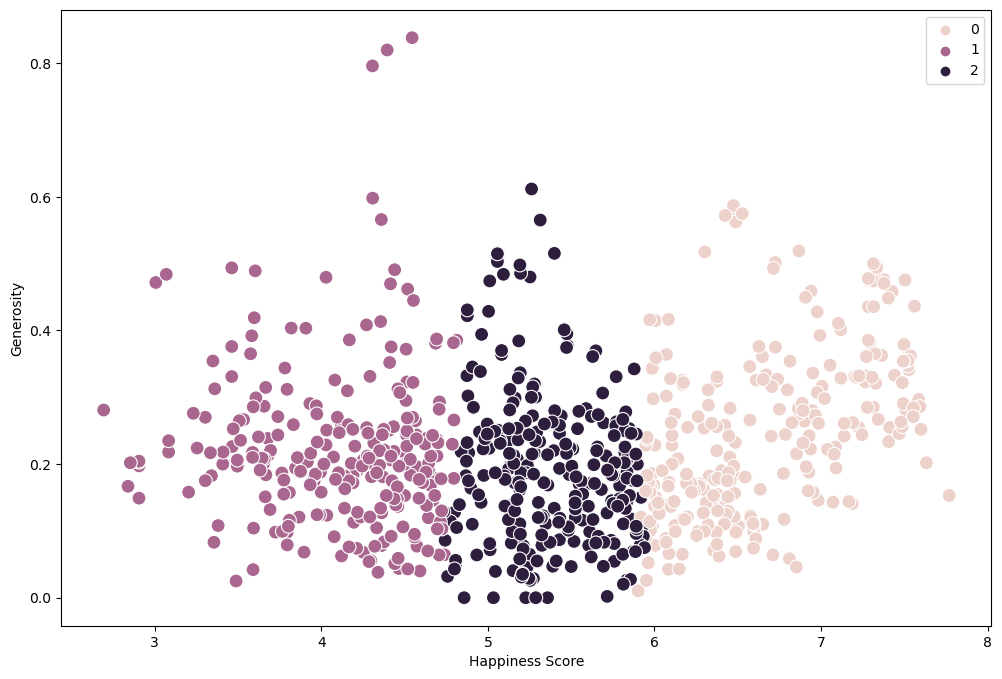

In [42]:
# Plot the clusters for the "Happiness_Score" and "Generosity" variables.

plt.figure(figsize=(12,8))
K_Score_Gen = sns.scatterplot(x=df['Happiness_Score'], y=df['Generosity'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

K_Score_Gen.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Generosity') # Label y-axis.
plt.show()

In [43]:
#save image to Visualizations folder
K_Score_Gen.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'K_Gen_Score_Scatter.png'))

#### This is just the same segregation of clusters along the Happiness Scale.

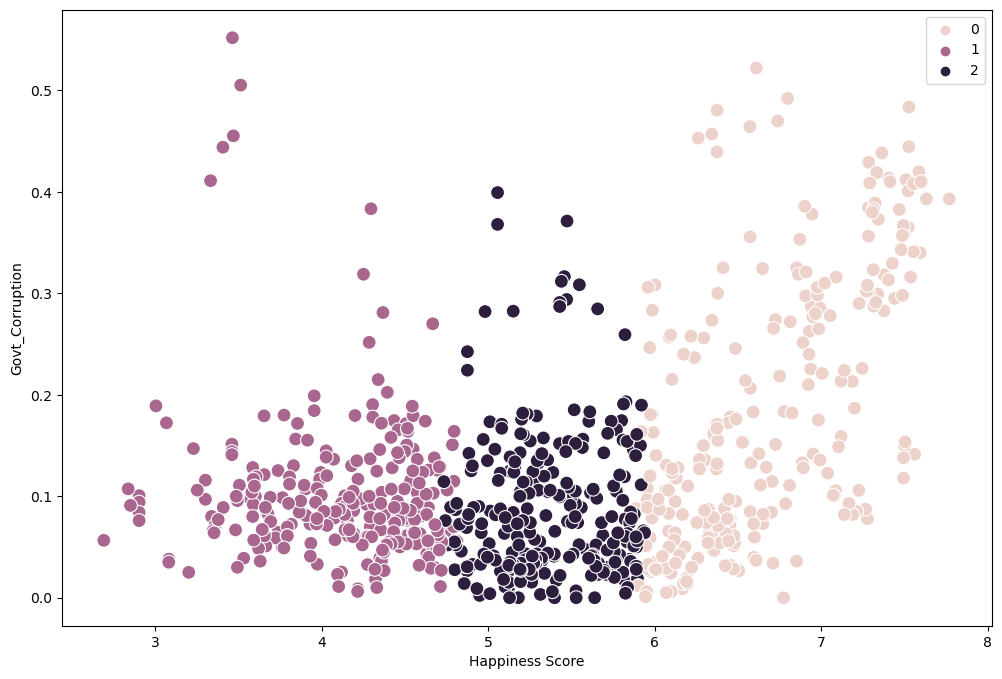

In [44]:
# Plot the clusters for the "Happiness_Score" and "Govt_Corruption" variables.

plt.figure(figsize=(12,8))
K_Score_Govt = sns.scatterplot(x=df['Happiness_Score'], y=df['Govt_Corruption'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

K_Score_Govt.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Govt_Corruption') # Label y-axis.
plt.show()

In [45]:
#save image to Visualizations folder
K_Score_Govt.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'K_Govt_Score_Scatter.png'))

##### This is the same segregation of clusters along the Happiness Scale. However, it seems reasonable that the the variables with the weakest correlations to Happiness Score (Freedom, Generosity, Govt_Corruption) could be the variables that give the edge in the final rankings. 

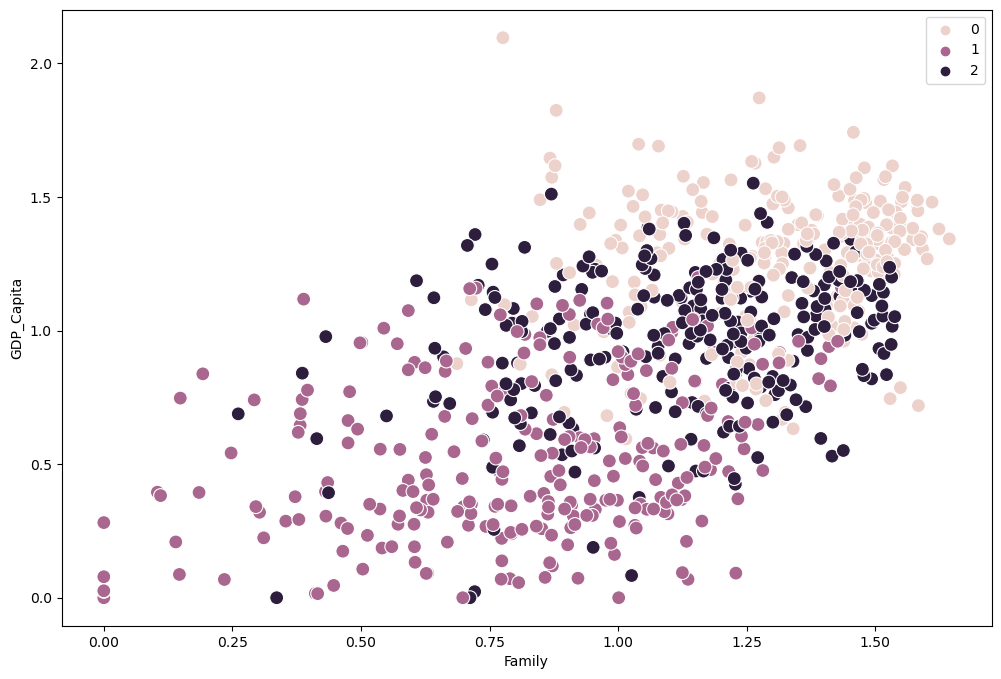

In [46]:
# Plot the clusters for the "Family" and "GDP_Capita" variables.

plt.figure(figsize=(12,8))
K_GDP_Fam = sns.scatterplot(x=df['Family'], y=df['GDP_Capita'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

K_GDP_Fam.grid(False) # This removes the grid from the background.
plt.xlabel('Family') # Label x-axis.
plt.ylabel('GDP_Capita') # Label y-axis.
plt.show()

In [47]:
#save image to Visualizations folder
K_GDP_Fam.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'K_GDP_Fam_Scatter.png'))

##### Countries with a higher contribution of GDP to Happiness also have a higher estimated contribution of Family (Social Support) to Happiness.  This makes sense as a country with a higher GDP could be expected to have more community resources (childcare, community events) and family support (especially with longer lifespans leading to retired family members) to makes happy memories,etc with. 

##### That said, there are plenty of countries that have a higher contribution of Family to the Happiness Score than their GDP. This could be the difference between a higher GDP leading to the ability to appreciate/partake in family/social support more and the contribution of Family being a source of happiness regardless of their country's wealth whether that be due to cultural differences or circumstantial due to their country's economic status.

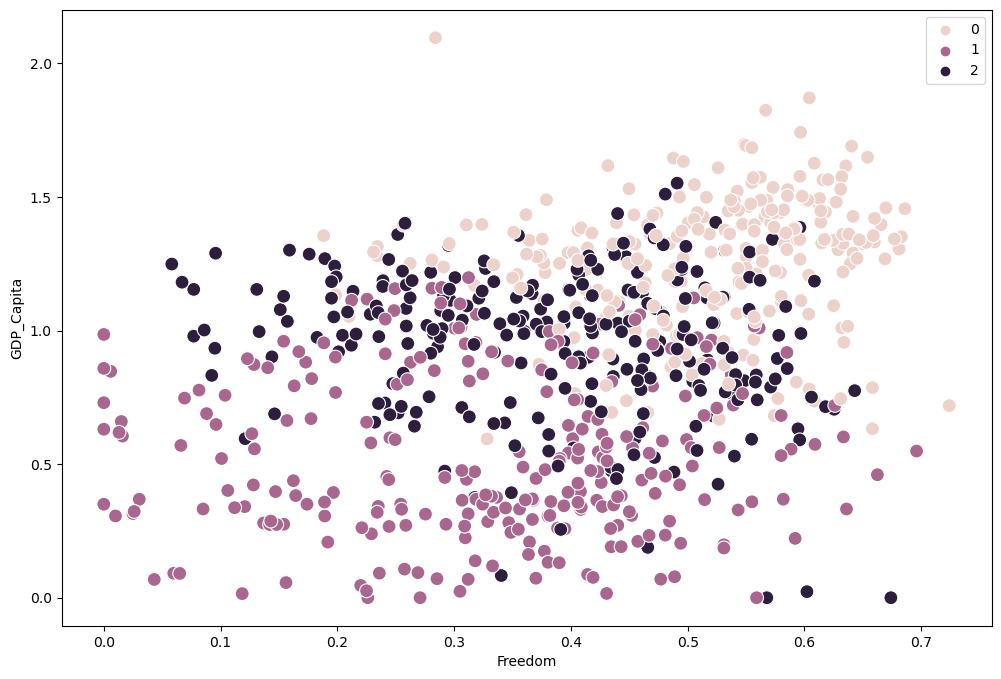

In [48]:
# Plot the clusters for the "Freedom" and "GDP_Capita" variables.

plt.figure(figsize=(12,8))
K_Free_GDP = sns.scatterplot(x=df['Freedom'], y=df['GDP_Capita'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

K_Free_GDP.grid(False) # This removes the grid from the background.
plt.xlabel('Freedom') # Label x-axis.
plt.ylabel('GDP_Capita') # Label y-axis.
plt.show()

In [49]:
#save image to Visualizations folder
K_Free_GDP.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'K_GDP_Free_Scatter.png'))

##### This appears to be an example where the estimated contribution of Freedom to the Happiness Score can give an edge in the rankings of the happiest countries, but there does not appear to be that strong of a relationship between Freedom and GDP_Capita.

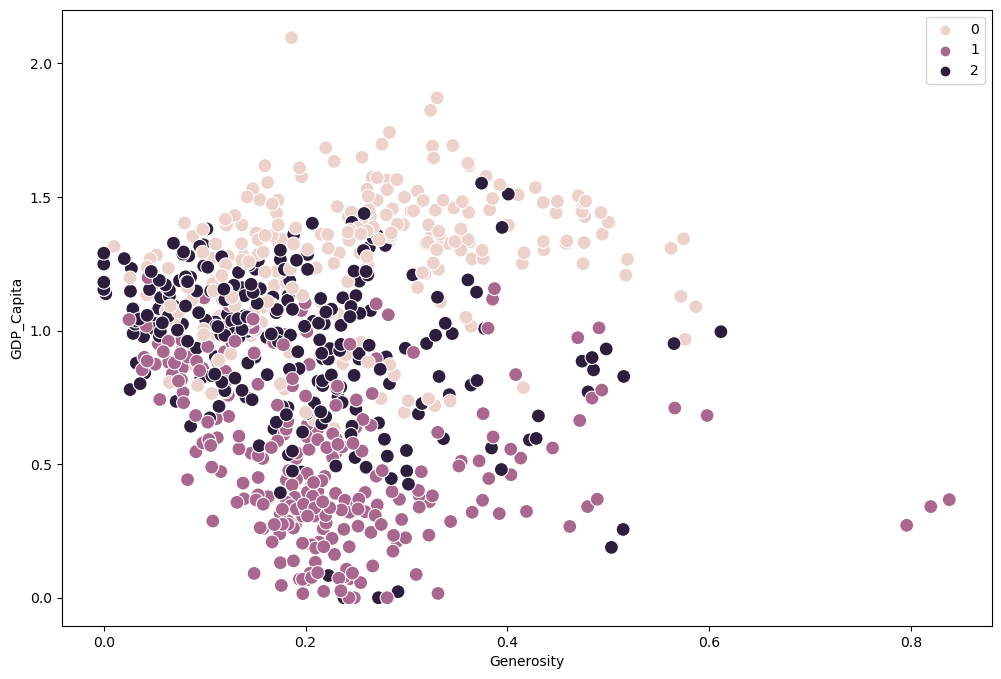

In [51]:
# Plot the clusters for the "Generosity" and "GDP_Capita" variables.

plt.figure(figsize=(12,8))
K_Gen_GDP = sns.scatterplot(x=df['Generosity'], y=df['GDP_Capita'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

K_Gen_GDP.grid(False) # This removes the grid from the background.
plt.xlabel('Generosity') # Label x-axis.
plt.ylabel('GDP_Capita') # Label y-axis.
plt.show()

In [52]:
#save image to Visualizations folder
K_Gen_GDP.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'K_GDP_Gen_Scatter.png'))

##### While one would think that countries with a higher GDP would have more capacity to be generous, not many higher GDP countries have a high estimated contribution of generosity to happiness. The countries displaying the highest estimated contribution of genorosity to happiness actually come from countries with a lower estimated contribution of GDP to happiness. 

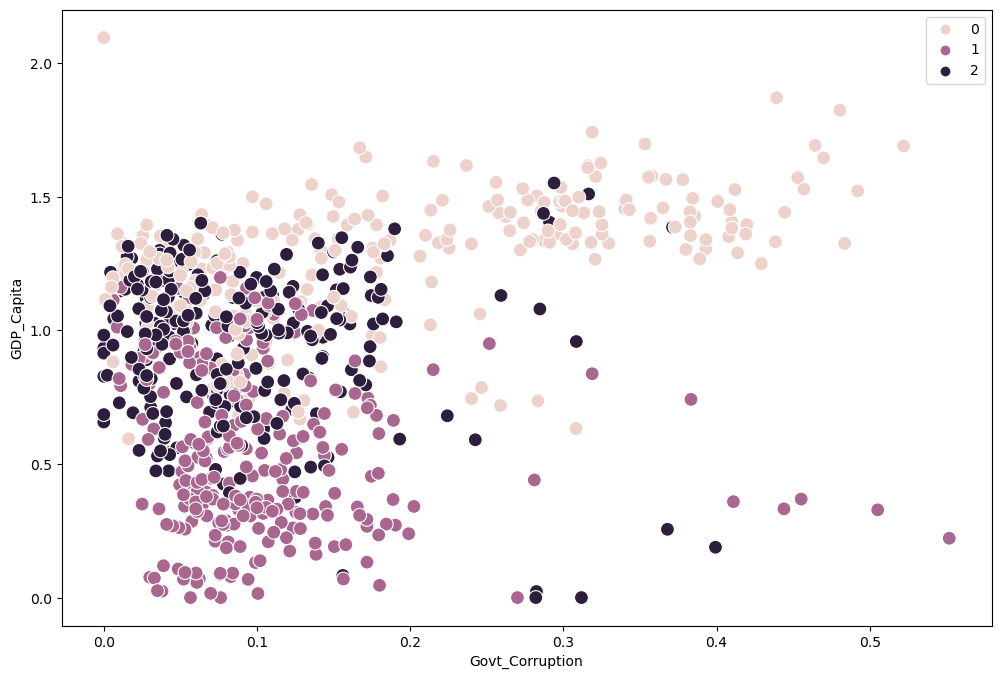

In [53]:
# Plot the clusters for the "Govt_Corruption" and "GDP_Capita" variables.

plt.figure(figsize=(12,8))
K_Govt_GDP = sns.scatterplot(x=df['Govt_Corruption'], y=df['GDP_Capita'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

K_Govt_GDP.grid(False) # This removes the grid from the background.
plt.xlabel('Govt_Corruption') # Label x-axis.
plt.ylabel('GDP_Capita') # Label y-axis.
plt.show()

In [54]:
#save image to Visualizations folder
K_Govt_GDP.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'K_GDP_Govt_Scatter.png'))

##### While overall, the estimated contribtuion of the perception of Government corruption appears to be the least important factor to a country's happiness score, this is another example of the a variable that can impact the rankings of the happiest countries. The countries with the higher GDP's run the length of the Govt_Corruption scale, so those with more favorable Govt_Corruption estimates can sway the final rankings. 

### Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [31]:
df.groupby('cluster').agg({'GDP_Capita':['mean', 'median'], 
                         'Life_Expectancy':['mean', 'median'], 
                         'Family':['mean', 'median'],
                          'Freedom':['mean', 'median'], 
                         'Generosity':['mean', 'median'],
                          'Govt_Corruption':['mean', 'median']})

GDP_Capita           Life_Expectancy              Family  \
                  mean    median            mean    median      mean   
cluster                                                                
dark purple   0.957150  0.996375        0.653778  0.661730  1.120393   
pink          1.265592  1.307820        0.803007  0.816044  1.299199   
purple        0.528382  0.471775        0.382232  0.359870  0.817591   

                        Freedom           Generosity          Govt_Corruption  \
               median      mean    median       mean   median            mean   
cluster                                                                         
dark purple  1.160919  0.387908  0.406665   0.189006  0.18000        0.089163   
pink         1.323055  0.514785  0.536373   0.247247  0.24200        0.184565   
purple       0.853755  0.331195  0.351794   0.219468  0.20245        0.102275   

                       
               median  
cluster                
dark purple  0.073173  
pink         0.145340  
purple       0.085910

##### The pink cluster has the highest means for all variables and so represent the happiest countries. Conversely, the purple cluster has the lowest means for all variables and thus represent lower ranking countries on the Happiness scale.

### Propose what these results could be useful for in future steps of an analytics pipeline.

#####  I found comparing each variable to the Happiness_Score to not be very useful as it would of course make sense that the higher an estimate, the higher the score (with some variables have a stronger correlation than others). As the GDP_Capita variable appears to have the strongest correlation to the happiness score, I was more interested in seeing how each variable relates the the GDP_Capita estimated contribution to happiness. This would allow for further investigation into which combination of variables leads to the happiest countries and, thus, what countries can focus on to improve the happiness of their citizens. 